<a href="https://colab.research.google.com/github/inefable12/SQP2024/blob/main/Machine_learning_Solubilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*GwbGztZOJtP1fNs6584mkQ.gif" width="300" alt="molecula"/>

---
$$\Large \textit{Sociedad Química del Perú | Curso: Inteligencia Artificial para la Escritura Científica}$$

---
<br>

$$\large\textbf{Sesión 3: Machine Learning para la predicción de la solubilidad}$$


$$\textit{Parte Práctica}$$

<br>
<br>



_Jesus Alvarado-Huayhuaz_

## 1. Instalación

In [1]:
# Instalamos rdkit y mols2grid
%%capture
!pip install rdkit-pypi mols2grid

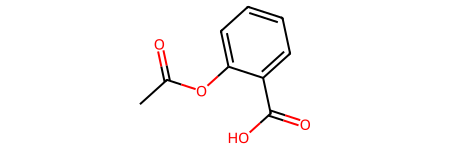

In [2]:
from rdkit.Chem import MolFromSmiles

mi_molecula = 'O=C(Oc1ccccc1C(=O)O)C'
MolFromSmiles(mi_molecula)

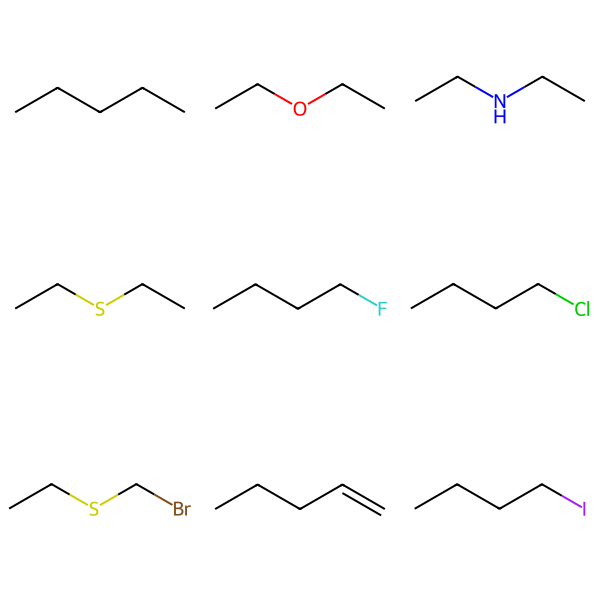

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_list = ['CCCCC', 'CCOCC','CCNCC',
               'CCSCC','CCCCF','CCCCCl',
               'CCSCBr','CCCC(=C)','CCCCI']

#Ahora usando "list comprehension"
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

imagen = Draw.MolsToGridImage(mol_list)
imagen

In [9]:
import mols2grid
mols2grid.display(mol_list)

MolGridWidget()

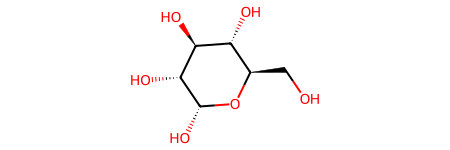

In [23]:
from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'
MolFromSmiles(alpha_d_glucose)

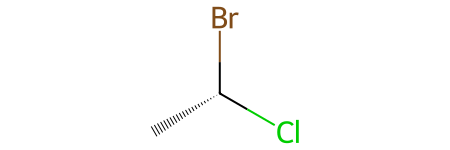

In [34]:
# molecula quiral
# @@ para el hidrógeno hacia el observador (saliente del plano de su pantalla)
# @ para el hidrógeno alejandose del observador (hacia atrás del plano de su pantalla)
quiral = "Br[C@@H](C)Cl"
MolFromSmiles(quiral)

# Nombre IUPAC

In [35]:
import requests

moleculas1 = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"

def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = moleculas1.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

In [36]:
smiles_to_iupac('c1ccccc1')

'BENZENE'

In [76]:
smiles_to_iupac('CC(=O)OC1=CC=CC=C1C(=O)O')

'2-acetyloxybenzoic acid'

# Pubchempy

In [38]:
%%capture
!pip install pubchempy

In [88]:
import pubchempy

smiles = 'O=C(NCc1ccc(C(F)(F)F)cc1)[C@@H]1Cc2[nH]cnc2CN1Cc1ccc([N+](=O)[O-])cc1'
compounds = pubchempy.get_compounds(smiles, namespace='smiles')
match = compounds[0]

In [89]:
print(match.iupac_name)

(6S)-5-[(4-nitrophenyl)methyl]-N-[[4-(trifluoromethyl)phenyl]methyl]-3,4,6,7-tetrahydroimidazo[4,5-c]pyridine-6-carboxamide


In [91]:
def mi_iupac(entrada):
  compounds = pubchempy.get_compounds(entrada, namespace='smiles')
  match = compounds[0]
  return print(match.iupac_name)

In [92]:
# Para la molécula: 1-Metil-4-(1-metiletenil)-ciclohexeno según https://pubchem.ncbi.nlm.nih.gov/compound/22311#section=InChI
mimolecula000 = "CC1=CCC(CC1)C(=C)C"
mi_iupac(mimolecula000)

1-methyl-4-prop-1-en-2-ylcyclohexene


Si tengo el nombre y quiero el SMILES (https://pompeu.neocities.org/smiles/5/):

1-methyl-4-prop-1-en-2-ylcyclohexene

CC1=CCC(CC1)C(=C)C

# Si se requiere WEB SCRAPPING

In [49]:
%%capture
# Install dependencies for install Google-Chrome
!sudo apt-get update
!sudo apt-get install -y libu2f-udev
!pip install selenium

In [50]:
# Install Google-Chrome
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get install -f
!rm -rf google-chrome-stable_current_amd64.deb

--2024-08-24 19:28:05--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 74.125.135.91, 74.125.135.136, 74.125.135.190, ...
Connecting to dl.google.com (dl.google.com)|74.125.135.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110726136 (106M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 105.60M   198MB/s    in 0.5s    

2024-08-24 19:28:06 (198 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [110726136/110726136]

(Reading database ... 123876 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (128.0.6613.84-1) over (128.0.6613.84-1) ...
Setting up google-chrome-stable (128.0.6613.84-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state i

In [54]:
# Dowload WebDriver
!wget https://chromedriver.storage.googleapis.com/110.0.5481.77/chromedriver_linux64.zip
!unzip chromedriver_linux64
!rm -rf chromedriver_linux64.zip
!rm -rf LICENSE.chromedriver

--2024-08-24 19:30:57--  https://chromedriver.storage.googleapis.com/110.0.5481.77/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7396711 (7.1M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   7.05M  --.-KB/s    in 0.1s    

2024-08-24 19:30:58 (58.1 MB/s) - ‘chromedriver_linux64.zip’ saved [7396711/7396711]

Archive:  chromedriver_linux64.zip
replace chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: chromedriver            
  inflating: LICENSE.chromedriver    


In [57]:
import pandas as pd
import numpy as np
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

In [58]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')

In [60]:
driver = webdriver.Chrome(options=chrome_options)

In [93]:
driver.get("https://es.wikipedia.org/wiki/%C3%81cido_acetilsalic%C3%ADlico")
time.sleep(5)
IUPAC = driver.find_element("xpath",'//*[@id="mw-content-text"]/div[1]/table[1]/tbody/tr[5]/td')
print('IUPAC: '+ IUPAC.text)

IUPAC: Ácido 2-(acetiloxi)-benzoico


In [94]:
driver.get("https://es.wikipedia.org/wiki/Isoniacida")
time.sleep(5)
IUPAC = driver.find_element("xpath",'//*[@id="mw-content-text"]/div[1]/table/tbody/tr[5]/td')
print('IUPAC: '+ IUPAC.text)
MasaMolecular = driver.find_element("xpath",'//*[@id="mw-content-text"]/div[1]/table/tbody/tr[13]/td')
print('Masa Molecular: '+ MasaMolecular.text)
CAS = driver.find_element("xpath",'//*[@id="mw-content-text"]/div[1]/table/tbody/tr[7]/td/span/a')
print('CAS: '+ CAS.text)
driver.quit()

IUPAC: pyridine-4-carbohydrazide
Masa Molecular: 137.139 g/mol
CAS: 54-85-3


## Otro ejemplo

In [73]:
# Definimos una variable base con la URL común a todos los enlaces
base_url = 'https://perunpdb.com.pe/#/compuesto/perunpdb_'

# Generamos una lista de números consecutivos desde 1 hasta 280, con formato de tres dígitos (001, 002, ...)
numeros = ['{:03d}'.format(i) for i in range(5, 10)]

# Inicializamos una lista vacía para almacenar los enlaces
enlaces = []

# Recorremos la lista de números y generamos los enlaces correspondientes
for num in numeros:
    enlace = base_url + num
    enlaces.append(enlace)

# Imprimimos la lista de enlaces generados
print(enlaces)

['https://perunpdb.com.pe/#/compuesto/perunpdb_005', 'https://perunpdb.com.pe/#/compuesto/perunpdb_006', 'https://perunpdb.com.pe/#/compuesto/perunpdb_007', 'https://perunpdb.com.pe/#/compuesto/perunpdb_008', 'https://perunpdb.com.pe/#/compuesto/perunpdb_009']


In [74]:
lista_smiles = []

for i in enlaces:
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  driver = webdriver.Chrome(options=chrome_options)
  driver.get(i)
  time.sleep(3)
  smiles = driver.find_element("xpath",'//*[@id="root"]/div/div[2]/div[1]/div[4]/h6')
  lista_smiles.append(smiles.text)

In [75]:
lista_smiles

['CC1CCC2(CCC3(C(=CCC4C3(CCC5C4(CCC(C5(C)C)O)C)C)C2C1C)C)C(=O)O',
 'CCCCCCCC(=O)O',
 'CCCCCCCCCC(=O)O',
 'CCCCCCCCCCCC(=O)O',
 'CCCCCCCCCCCCCC(=O)O']

# Para nomenclatura R y S

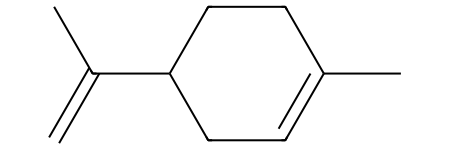

In [96]:
MolFromSmiles("CC1=CCC(CC1)C(=C)C")

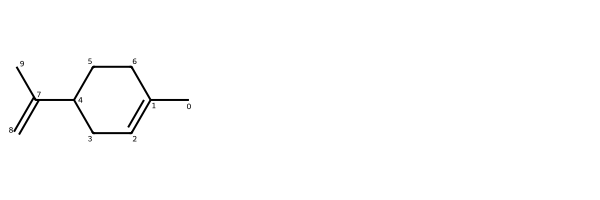

In [116]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

smiles = "CC1=CCC(CC1)C(=C)C"

# Convertimos a elemento de RDKit
mol = Chem.MolFromSmiles(smiles)

# Dibujamos la estructura
Draw.MolsToGridImage([mol])

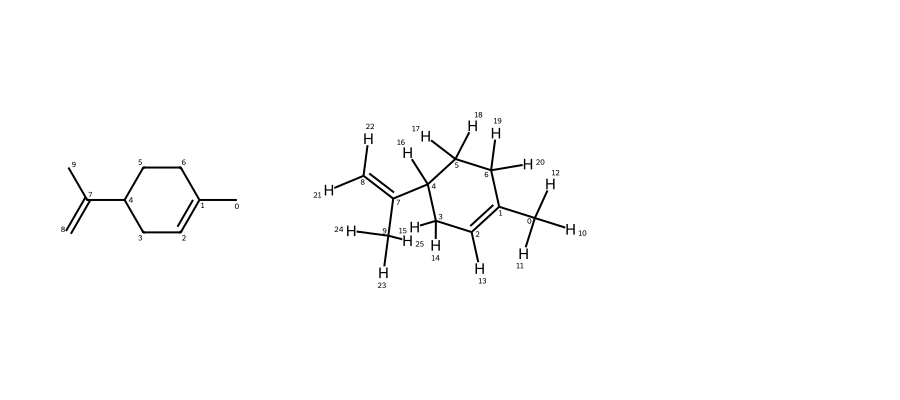

In [118]:
# Agregamos hidrógenos
mol_h = Chem.AddHs(mol)

# Mostramos ambas estructuras
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,400))

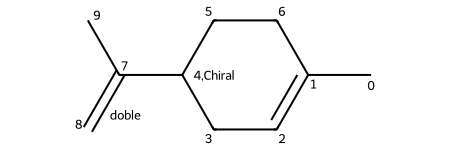

In [123]:
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles('CC1=CCC(CC1)C(=C)C')
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(4).SetProp('atomNote', 'Chiral')
mol.GetBondWithIdx(7).SetProp('bondNote', 'doble')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
mol

In [102]:
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

Otro ejemplo

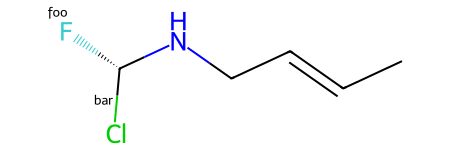

In [103]:
mol

volviendo al limoneno: https://es.wikipedia.org/wiki/Limoneno

https://www.researchgate.net/figure/Molecular-structure-of-R-limonene-and-S-limonene_fig2_263823956

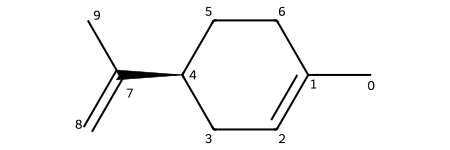

In [128]:
# Isómero S
MolFromSmiles("CC1=CC[C@H](CC1)C(=C)C")

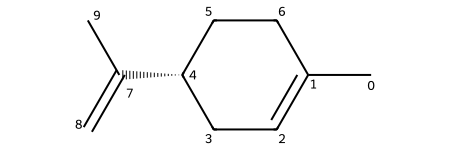

In [129]:
# Isómero R
MolFromSmiles("CC1=CC[C@@H](CC1)C(=C)C")

# Continuando

In [130]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2024-08-24 20:30:51--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.008s  

2024-08-24 20:30:52 (7.00 MB/s) - ‘delaney.csv’ saved [58889/58889]



In [132]:
import pandas as pd
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [133]:
# Para seleccionar solo una columna, por ejm SMILES
sol.SMILES

,SMILES
0,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl
...,...
1139,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [134]:
# Para seleccionar solo una instancia de la columna:
sol.SMILES[4]

'FC(F)(Cl)C(F)(Cl)Cl'

In [135]:
# descriptor para 1 instancia
from rdkit import Chem
m = Chem.MolFromSmiles(sol.SMILES[4])
m.GetNumAtoms()

8

In [136]:
# para usar todas
from rdkit import Chem
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [137]:
mol_list

 ...]

# 2. Calcular descriptores moleculares
Ahora representaremos cada una de las moléculas del conjunto de datos mediante un conjunto de descriptores moleculares que se utilizarán para la construcción de modelos.

1. LogP (coeficiente de partición octanol-agua)
2. MW (peso molecular)
3. RB (Número de enlaces rotativos)
4. AP (proporción aromática = número de átomos aromáticos / número de átomos pesados)

Función personalizada denominada generate() para calcular los 3 descriptores LogP, MW y RB

In [138]:
import numpy as np
from rdkit.Chem import Descriptors
# Inspiración: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MolLogP","MolWt","NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [139]:
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [140]:
# Sobre el número de átomos aromáticos
SMILES = 'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21'
m = Chem.MolFromSmiles(SMILES)
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms
# False: no es un átomo aromático
# True: sí es un átomo aromático

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [141]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [142]:
# Aplicando al ejemplo con "m"
AromaticAtoms(m)

19

In [143]:
# Aplicándole a todos, mediante iteración
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [144]:
# Número de átomos pesados
SMILES = 'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21'
m = Chem.MolFromSmiles(SMILES)
Descriptors.HeavyAtomCount(m)

34

In [145]:
# Aplicándole a todos, mediante iteración
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

In [146]:
# Proporción aromática de "m"
SMILES = 'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21'
m = Chem.MolFromSmiles(SMILES)
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

In [147]:
# Aplicándole a todos, mediante iteración
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion)
df_desc_AromaticProportion

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


# 3. Preparación del conjunto de datos: Matriz X

In [148]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,0
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [149]:
# Renombrando las columnas
X = X.rename(columns={'MolLogP':'MolLogP', 'MolWt':'MolWt', 'NumRotatableBonds':'NumRotatableBonds', 0:'AromaticProportion'})
X.columns

Index(['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion'], dtype='object')

In [150]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# 4. Preparación del conjunto de datos: Matriz Y

In [151]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [152]:
Y = sol.iloc[:,1]
Y

,measured log(solubility:mol/L)
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


Separando nuestros datos de entrenamiento y prueba

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [154]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
617,3.27740,168.239,2.0,0.923077
585,1.04280,74.123,2.0,0.000000
439,3.47180,182.266,3.0,0.857143
228,2.36260,84.162,2.0,0.000000
185,2.00904,122.167,0.0,0.666667
...,...,...,...,...
1000,2.97670,112.216,2.0,0.000000
1009,2.70950,217.268,2.0,0.375000
538,1.04150,281.352,3.0,0.000000
493,-0.28950,93.513,1.0,0.000000


In [155]:
Y_train

,measured log(solubility:mol/L)
617,-4.08
585,-0.09
439,-4.62
228,-3.03
185,-1.29
...,...
1000,-4.74
1009,-2.56
538,-1.13
493,-0.02


In [156]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
993,0.91998,55.080,0.0,0.000000
599,2.39500,299.691,8.0,0.000000
864,3.85950,327.123,3.0,0.571429
703,-3.21980,180.156,2.0,0.000000
302,1.16730,88.150,2.0,0.000000
...,...,...,...,...
1082,4.01440,261.919,1.0,0.461538
101,0.67310,89.094,2.0,0.000000
995,0.95950,102.133,2.0,0.000000
396,1.69520,108.140,1.0,0.750000


In [157]:
Y_test

,measured log(solubility:mol/L)
993,0.280
599,0.523
864,-4.700
703,0.640
302,-0.240
...,...
1082,-4.020
101,-0.800
995,-0.720
396,-1.850


# 5. Modelo de regresión lineal

In [158]:
# Entrenamiento para RL
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Predicción y métricas de logS de la data entrenada

In [159]:
Y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.73981944 -0.00666862  0.00646555 -0.4419633 ]
Intercept: 0.2590513151744416
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.78


Data de Test

In [160]:
Y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.73981944 -0.00666862  0.00646555 -0.4419633 ]
Intercept: 0.2590513151744416
Mean squared error (MSE): 1.02
Coefficient of determination (R^2): 0.74


# ECUACIONES

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

 si model.intercept_ tiene un valor de 1.234567, el siguiente código lo formateará como '1.23'.

In [161]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]
print('LogS = ' +
      ' ' +
      yintercept +
      ' + ' +
      LogP +
      ' +' +
      MW +
      ' + ' +
      RB +
      ' + ' +
      AP)

LogS =  0.26 + -0.74 LogP +-0.0067 MW + 0.0065 RB + -0.44 AP


__Full data set__

In [167]:
# Usando nuestro dataset: x e Y, le llamaremos full
full = linear_model.LinearRegression()
full.fit(X, Y)

LinearRegression()

In [168]:
full_pred = model.predict(X)
print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997185
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [169]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '+ %.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]
print('LogS = ' +
      ' ' +
      full_yintercept +
      ' ' +
      full_LogP +
      ' ' +
      full_MW +
      ' ' +
      full_RB +
      ' ' +
      full_AP)

LogS =  0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


# __Predicción vs Experimental__

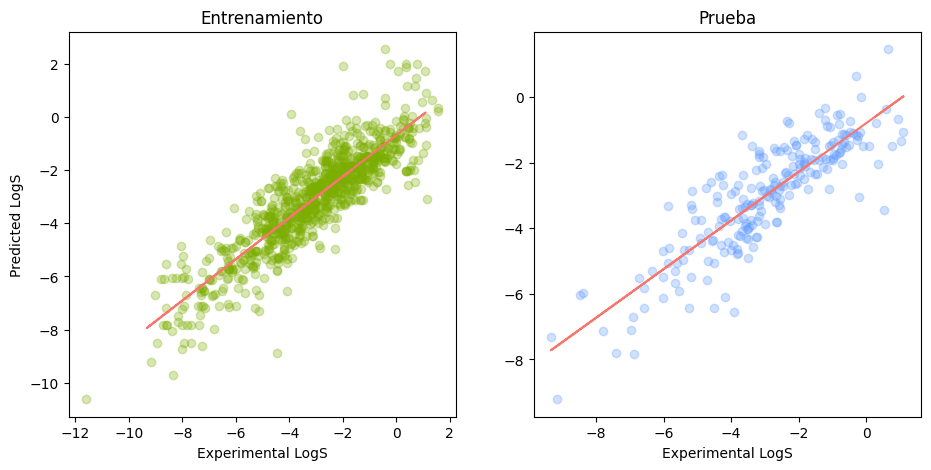

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)
plt.title("Entrenamiento")

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)
plt.title("Prueba")

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental LogS')

#Guardando la gráfica
#plt.savefig('plot_horizontal_logS.png')
#plt.savefig('plot_horizontal_logS.pdf')
plt.show()

Delaney:
__LogS = 0.16 - 0.63 cLogP - 0.0062 MW + 0.066 RB - 0.74 AP__

Pat Walters:
__LogS = 0.26 - 0.74 LogP - 0.0066 MW + 0.0034 RB - 0.42 AP__

TutoBas Train set:
__LogS =  0.26 - 0.73 LogP - 0.0069 MW 0.0163 RB - 0.36 AP__

Full dataset
__LogS =  0.26 - 0.74 LogP - 0.0066 MW + 0.0032 RB - 0.42 AP__